In [148]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [149]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-08 14:26:00--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.6’

data.csv.6          100%[===================>]   1.41M  6.50MB/s    in 0.2s    

2023-10-08 14:26:00 (6.50 MB/s) - ‘data.csv.6’ saved [1475504/1475504]



In [150]:
df = pd.read_csv('data.csv')

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [151]:
only_fields = [
    "Make",
    "Model",
    "Year",
    "Engine HP",
    "Engine Cylinders",
    "Transmission Type",
    "Vehicle Style",
    "highway MPG",
    "city mpg",
    "MSRP"
]
df_new = df.filter(only_fields)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [152]:
df_new.columns = df_new.columns.str.replace(' ', '_').str.lower()
df_new = df_new.fillna(0)
df_new.rename(columns = {'msrp':'price'}, inplace = True)
mean_price = df_new["price"].mean()
df_new['above_average'] = df_new.apply(lambda x: 1 if x["price"] > mean_price else 0, axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
 10  above_average      11914 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1024.0+ KB


In [153]:
df_no_price = df_new.loc[:, ~df_new.columns.isin(['price'])]
df_no_price

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


In [154]:
df_full_train, df_test = train_test_split(df_no_price, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_train = df_train.above_average.values
y_val = df_val.above_average.values

y_train = df_train.above_average
y_val = df_val.above_average
y_test = df_test.above_average

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [155]:
# Question 1: ROC AUC feature importance
# ROC AUC could also be used to evaluate feature importance of numerical variables.

# Let's do that

# For each numerical variable, use it as score and compute AUC with the above_average variable
# Use the training dataset for that
# If your AUC is < 0.5, invert this variable by putting "-" in front

# (e.g. -df_train['engine_hp'])

# AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

# Which numerical variable (among the following 4) has the highest AUC?

numerical_fields = df_train.select_dtypes(include=np.number).columns.tolist()

In [156]:
numerical_fields

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [157]:
from sklearn.metrics import roc_auc_score
from collections import defaultdict

top_auc = defaultdict(int)

for field in numerical_fields:
    auc = roc_auc_score(y_train, df_train[field])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[field])
    print(f'{field}: {auc}')
    top_auc[field] = auc

max_key = max(top_auc, key=top_auc.get)
print("Answer:", max_key, top_auc[max_key])

year: 0.687551492804683
engine_hp: 0.9171031265539011
engine_cylinders: 0.766116490165669
highway_mpg: 0.6330587871772013
city_mpg: 0.6734244643245233
Answer: engine_hp 0.9171031265539011


In [158]:
# Question 2: Training the model
# Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

# LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
# What's the AUC of this model on the validation dataset? (round to 3 digits)

In [159]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


columns = df_train.columns
train_dicts = df_train[df_train.columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[df_train.columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

y_pred_bin = model.predict(X_val)
roc_auc_score(y_val, y_pred_bin)

0.9115082165540882

In [160]:
answer = roc_auc_score(y_val, y_pred)
round(answer, 3)

0.977

In [161]:
# Question 3: Precision and Recall
# Now let's compute precision and recall for our model.

# Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
# For each threshold, compute precision and recall
# Plot them
# At which threshold precision and recall curves intersect?

In [162]:
def conf_mat_df(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

df_scores = conf_mat_df(y_val, y_pred)

In [163]:
df_scores

,threshold,tp,fp,fn,tn
0,0.00,654,1729,0,0
1,0.01,652,839,2,890
2,0.02,651,680,3,1049
3,0.03,651,592,3,1137
4,0.04,650,543,4,1186
...,...,...,...,...,...
96,0.96,255,1,399,1728
97,0.97,237,1,417,1728
98,0.98,211,0,443,1729
99,0.99,181,0,473,1729


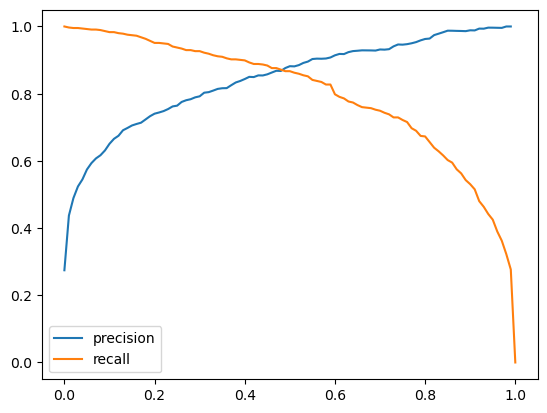

In [164]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)
plt.plot(df_scores.threshold, df_scores.precision, label='precision')
plt.plot(df_scores.threshold, df_scores.recall, label='recall')

plt.legend()
plt.show()

In [165]:
df_details = df_scores[df_scores['threshold'].between(0.4, 0.5)]
df_details

,threshold,tp,fp,fn,tn,precision,recall
40,0.40,588,109,66,1620,0.843615,0.899083
41,0.41,584,103,70,1626,0.850073,0.892966
42,0.42,581,103,73,1626,0.849415,0.888379
43,0.43,581,99,73,1630,0.854412,0.888379
44,0.44,580,99,74,1630,0.854197,0.886850
45,0.45,578,96,76,1633,0.857567,0.883792
46,0.46,573,91,81,1638,0.862952,0.876147
47,0.47,573,87,81,1642,0.868182,0.876147
48,0.48,570,87,84,1642,0.867580,0.871560
49,0.49,567,80,87,1649,0.876352,0.866972


In [166]:
print("Answer: 0.45")

Answer: 0.45


In [167]:
# Question 4: F1 score
# Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both
# Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

# At which threshold F1 is maximal?

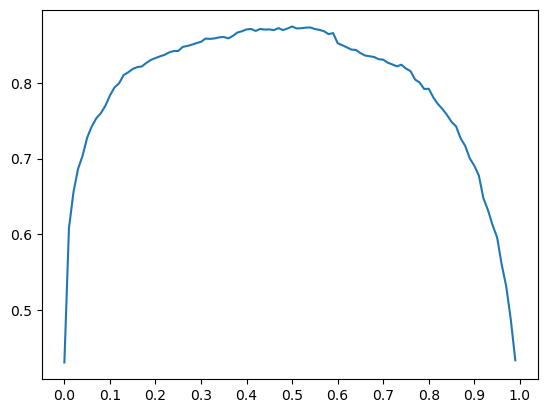

In [168]:
df_scores['f1'] = 2 * df_scores.precision * df_scores.recall / (df_scores.precision + df_scores.recall)
plt.plot(df_scores.threshold, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [169]:
df_scores.iloc[df_scores['f1'].argmax()]

threshold       0.500000
tp            567.000000
fp             76.000000
fn             87.000000
tn           1653.000000
precision       0.881804
recall          0.866972
f1              0.874325
Name: 50, dtype: float64

In [170]:
# Question 5: 5-Fold CV
# Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

# KFold(n_splits=5, shuffle=True, random_state=1)
# Iterate over different folds of df_full_train
# Split the data into train and validation
# Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
# Use AUC to evaluate the model on validation
# How large is standard devidation of the scores across different folds?

In [171]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [173]:
from sklearn.model_selection import KFold

scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average
    y_val = df_val.above_average

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))
print("Answer", np.std(scores))

0.979 +- 0.003
Answer 0.002919359965989712


In [174]:
# Question 6: Hyperparemeter Tuning
# Now let's use 5-Fold cross-validation to find the best parameter C

# Iterate over the following C values: [0.01, 0.1, 0.5, 10]
# Initialize KFold with the same parameters as previously
# Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
# Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
# Which C leads to the best mean score?

In [176]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average
        y_val = df_val.above_average

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.952 +- 0.002
C= 0.1, 0.972 +- 0.002
C=   1, 0.979 +- 0.003
C=  10, 0.981 +- 0.003


In [178]:
print("Answer: C=  10, 0.981 +- 0.003")

Answer: C=  10, 0.981 +- 0.003
